In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning )

In [4]:
olist_customers_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
olist_orders_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
olist_order_items_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
olist_geolocation_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
olist_products_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
product_category_name_translation=  pd.read_csv('./kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')
olist_geolocation_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
olist_sellers_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
olist_order_payments_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')


olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])
filter1 = olist_orders_dataset['order_purchase_timestamp'] > '2016-12-31'
filter2 = olist_orders_dataset['order_purchase_timestamp'] < '2018-09-1'
filter3 = ~olist_orders_dataset['order_status'].isin(['unavailable' ,'canceled']) ## not in condition

olist_orders_dataset = olist_orders_dataset[(filter1 & filter2 & filter3)] ### order between 2017 and 2018 and ordered.
print('numbers of orders : ', olist_orders_dataset.shape[0])
print('first order : '  , olist_orders_dataset['order_purchase_timestamp'].min())
print('last order : ' , olist_orders_dataset['order_purchase_timestamp'].max())

numbers of orders :  97910
first order :  2017-01-05 11:56:06
last order :  2018-08-29 15:00:37


In [5]:

olist_orders_dataset.dropna(inplace=True)
olist_orders_dataset.drop_duplicates(inplace=True)
print('duplicates', olist_order_items_dataset.duplicated().sum())
print('Na values',olist_order_items_dataset.isna().sum().values.sum())

duplicates 0
Na values 0


In [7]:
order_data = olist_order_items_dataset.groupby('order_id').agg( {'order_item_id':'max' ,  'price' :'sum' , 'freight_value': "sum" }).reset_index()

In [8]:
daily_data = olist_orders_dataset.groupby(pd.Grouper(key='order_purchase_timestamp', freq='D')).size().reset_index(name='count')

In [9]:
daily_data

,order_purchase_timestamp,count
0,2017-01-05,32
1,2017-01-06,4
2,2017-01-07,4
3,2017-01-08,4
4,2017-01-09,5
...,...,...
597,2018-08-25,69
598,2018-08-26,73
599,2018-08-27,66
600,2018-08-28,39


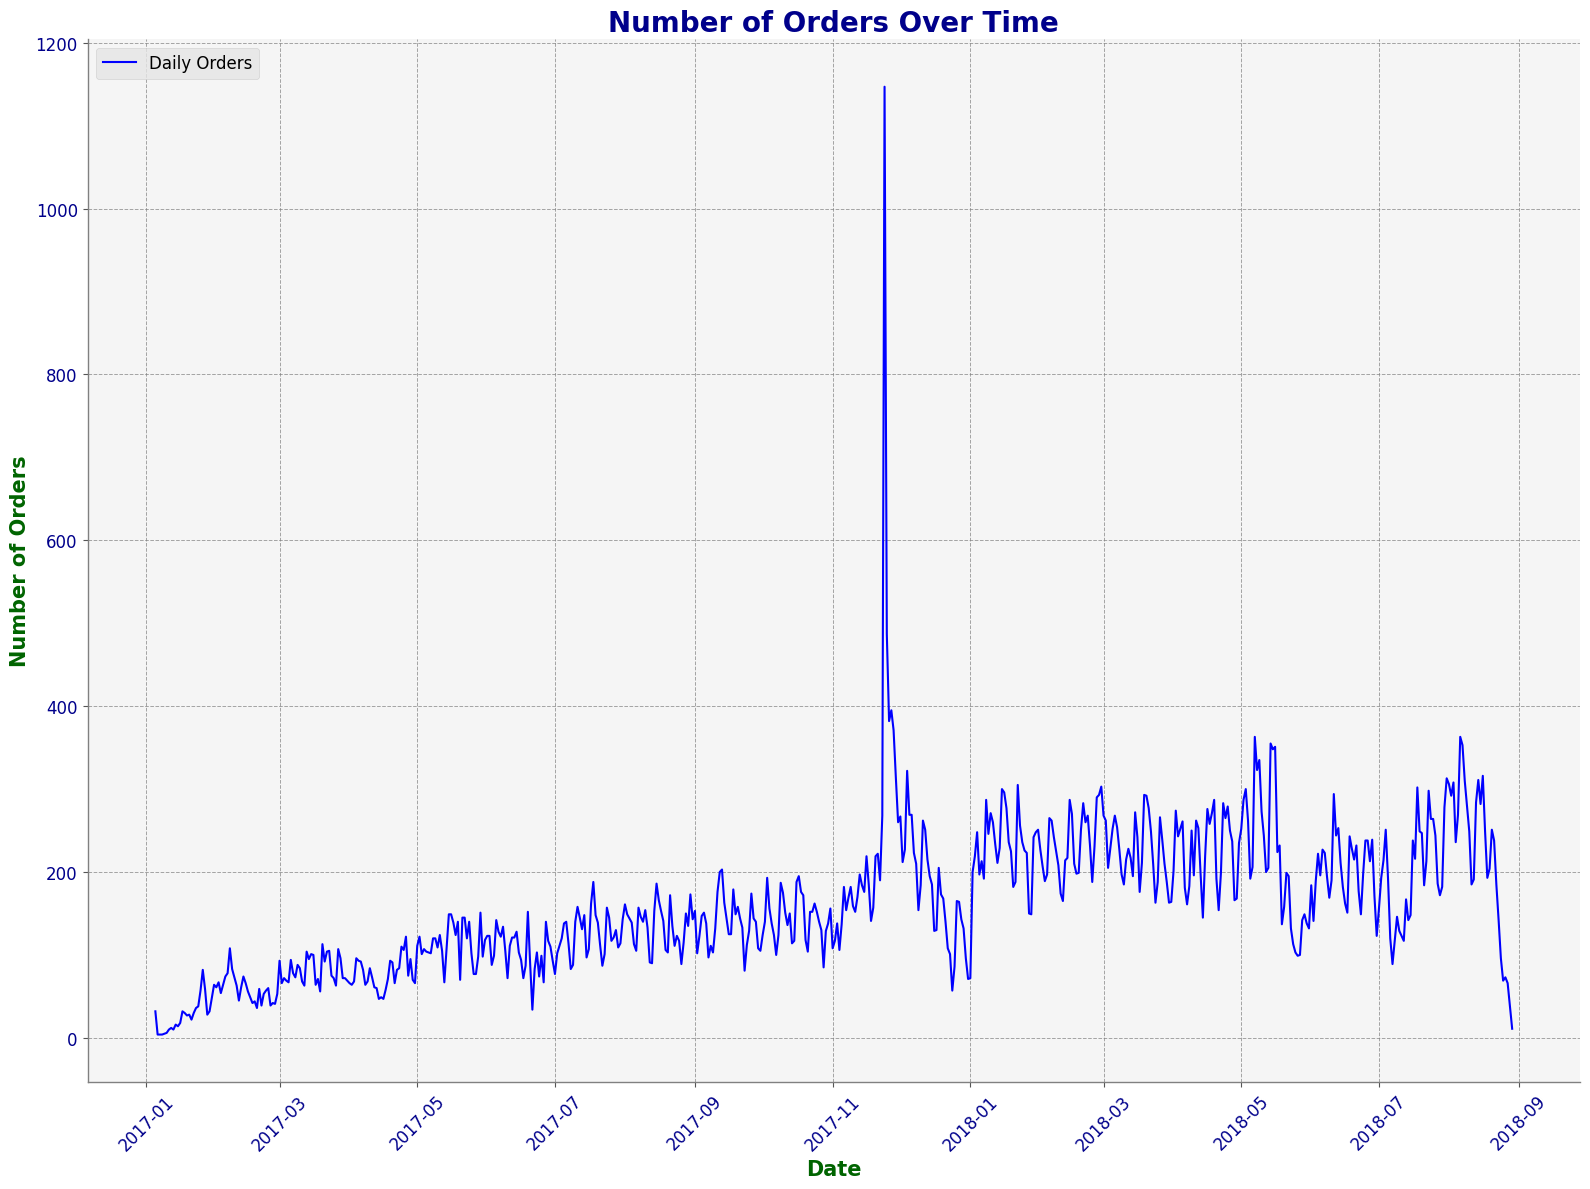

In [11]:
plt.figure(figsize=(16,12))
# Line plot with markers
sns.lineplot(data=daily_data, x='order_purchase_timestamp', y='count', color='blue', linestyle='-', markersize=2, markerfacecolor='red', markeredgewidth=2, markeredgecolor='black')

# Customize the plot
plt.title('Number of Orders Over Time', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Orders', fontsize=15, fontweight='bold', color='darkgreen')
plt.xticks(rotation=45, fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha=0.7)
plt.gca().set_facecolor('whitesmoke')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Adding a legend
plt.legend(['Daily Orders'], loc='upper left', fontsize=12)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()



In [33]:
daily_data.to_csv('order_per_day.csv', index=False)

In [32]:
daily_data

,order_purchase_timestamp,count
0,2017-01-05,32
1,2017-01-06,4
2,2017-01-07,4
3,2017-01-08,4
4,2017-01-09,5
...,...,...
597,2018-08-25,69
598,2018-08-26,73
599,2018-08-27,66
600,2018-08-28,39
